In [1]:
import torch
import numpy as np

import h5py
import matplotlib.pyplot as plt

In [2]:
def normalized_rmse(predictions, true_values):
  """
  Calculates the Normalized Root Mean Squared Error (nRMSE).

  Args:
    predictions: A array containing the predicted values.
    true_values: A array containing the true values.

  Returns:
    The normalized root mean squared error.
  """
  #print(predictions.shape, true_values.shape)

  rmse = torch.sqrt(torch.mean((predictions - true_values) ** 2, dim = 1 ) )

  nrmse = rmse /   torch.sqrt(torch.mean((true_values) ** 2, dim = 1) )    #torch.std(true_values)
  #return torch.mean(nrmse)
  return nrmse

In [11]:
def analyze_result(file_loc):
    res = torch.load(file_loc, map_location="cpu")
    try:
        prediction_B1_cons = res["train_cons_ro_250"][1]
        actual_B1_cons = res["train_cons_ro_250"][2]
        #print( res["test_cons_ro_250"][3][0])
        nrmse_cons = normalized_rmse(prediction_B1_cons, actual_B1_cons)
        train_cons = [nrmse_cons, prediction_B1_cons, actual_B1_cons]
    except:
        train_cons = [0,0,0]
    try:
        prediction_B1_cons = res["test_cons_ro_250"][1]
        actual_B1_cons = res["test_cons_ro_250"][2]
        #print( res["test_cons_ro_250"][3][0])
        nrmse_cons = normalized_rmse(prediction_B1_cons, actual_B1_cons)
        test_cons = [nrmse_cons, prediction_B1_cons, actual_B1_cons]
    except:
        test_cons = [0,0,0]
    try:
        prediction_B1_var = res["test_var_ro_250"][1]
        actual_B1_var = res["test_var_ro_250"][2]
        #print( res["test_var_ro_250"][3][0])
        nrmse_var = normalized_rmse(prediction_B1_var, actual_B1_var)
        var = [nrmse_var,prediction_B1_var, actual_B1_var]
    except:
        var = [0,0,0]
    
    return [train_cons, test_cons], var

In [17]:
file_loc = "result/A1/constant_time/dt_1_ms_1_horizon_1/run_1/run_1_result_prior_dt1_3.pt"
test_dim_32 = analyze_result(file_loc)

In [12]:
file_loc = "/nobackup/scoc/variable_autoregression/result/A1/constant_time/dt_1_ms_1_horizon_1/run_1_dim_32_1/run_1_dim_32_1_result_prior_dt1_3.pt"
test_dim_32_1 = analyze_result(file_loc)

In [19]:
file_loc = "/nobackup/scoc/variable_autoregression/result/A1/constant_time/dt_1_ms_1_horizon_1/run_1_dim_32_2/run_1_dim_32_2_result_prior_dt1_3.pt"
test_dim_32_2 = analyze_result(file_loc)

In [13]:
test_dim_32_1[0][0][1].shape

torch.Size([2048, 256, 200])

In [7]:
file_loc = "/nobackup/scoc/variable_autoregression/result/B1/constant_time/dt_1_ms_10_horizon_3/run_2_iteration_200/run_2_iteration_200_result_prior_dt1_3.pt"
test_cons_iter_200 = analyze_result(file_loc)

In [8]:
file_loc = "/nobackup/scoc/variable_autoregression/result/B1/variable_time/B1_1_FNO_attention/run_6_iteration_200/run_6_iteration_200_result_prior_dt1_3.pt"
test_var_iter_200 = analyze_result(file_loc)

In [14]:
test_dim_32_1[0][0][0].shape

torch.Size([2048, 200])

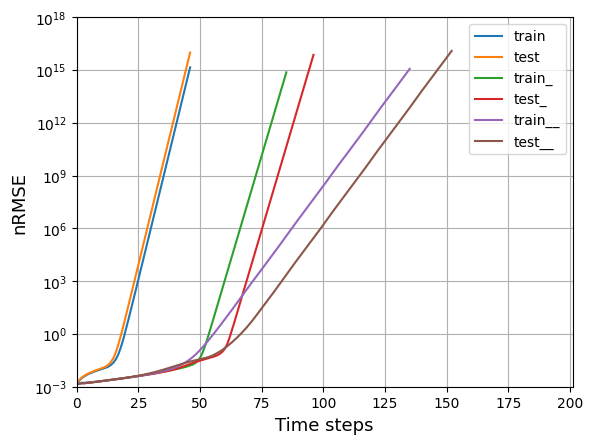

In [26]:
plt.plot(torch.arange(1,201), torch.mean(test_dim_32_1[0][0][0], dim=0), label="train" )
plt.plot(torch.arange(1,201), torch.mean(test_dim_32_1[0][1][0], dim=0), label="test" )

plt.plot(torch.arange(1,201), torch.mean(test_dim_32[0][0][0], dim=0), label="train_" )
plt.plot(torch.arange(1,201), torch.mean(test_dim_32[0][1][0], dim=0), label="test_" )

plt.plot(torch.arange(1,201), torch.mean(test_dim_32_2[0][0][0], dim=0), label="train__" )
plt.plot(torch.arange(1,201), torch.mean(test_dim_32_2[0][1][0], dim=0), label="test__" )

plt.legend()
plt.yscale("log")
plt.ylim([1e-3,1e18])
plt.xlim([0,201])
plt.xlabel("Time steps", fontsize="13")
plt.ylabel("nRMSE", fontsize="13")
plt.grid()

In [39]:
file_loc = "/nobackup/scoc/variable_autoregression/result/A1/constant_time/dt_1_ms_1_horizon_1/run_1_dim_64/run_1_dim_64_result_prior_dt1_3.pt"
test_dim_64 = analyze_result(file_loc)

In [30]:
file_loc = "/nobackup/scoc/variable_autoregression/result/A1/constant_time/dt_1_ms_1_horizon_1/run_1_dim_64_1/run_1_dim_64_1_result_prior_dt1_3.pt"
test_dim_64_1 = analyze_result(file_loc)

In [36]:
test_dim_64[0][1][0].shape

torch.Size([128, 200])

In [40]:
test_dim_64[0][0][0].shape

torch.Size([2048, 200])

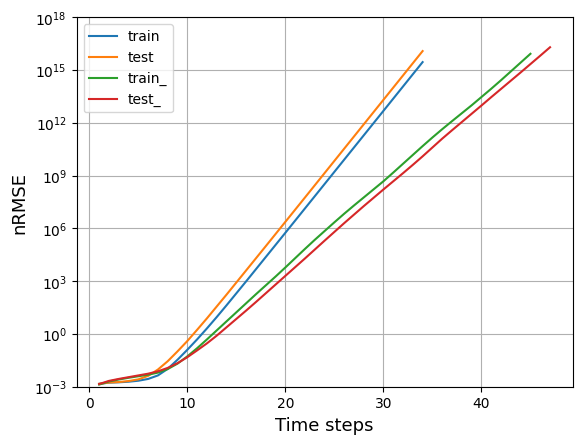

In [41]:
plt.plot(torch.arange(1,201), torch.mean(test_dim_64[0][0][0], dim=0), label="train" )
plt.plot(torch.arange(1,201), torch.mean(test_dim_64[0][1][0], dim=0), label="test" )

plt.plot(torch.arange(1,201), torch.mean(test_dim_64_1[0][0][0], dim=0), label="train_" )
plt.plot(torch.arange(1,201), torch.mean(test_dim_64_1[0][1][0], dim=0), label="test_" )

# plt.plot(torch.arange(1,201), torch.mean(test_dim_32_2[0][0][0], dim=0), label="train__" )
# plt.plot(torch.arange(1,201), torch.mean(test_dim_32_2[0][1][0], dim=0), label="test__" )

plt.legend()
plt.yscale("log")
plt.ylim([1e-3,1e18])
#plt.xlim([0,201])
plt.xlabel("Time steps", fontsize="13")
plt.ylabel("nRMSE", fontsize="13")
plt.grid()